<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [203]:
import matplotlib.pyplot as plt

%matplotlib inline

In [204]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])
df = pd.concat([X, y], axis=1)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [205]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


In [206]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [207]:
#total nulls
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [208]:
#index
df.index

RangeIndex(start=0, stop=506, step=1)

In [209]:
#data types
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [210]:
#shape
df.shape

(506, 14)

In [211]:
#summary statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [212]:
#number of unique values for each column
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [213]:
#determining predictors with highest correlation to MEDV
np.abs(df.corr()['MEDV']).sort_values(ascending=False)[1:6]

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
Name: MEDV, dtype: float64

In [214]:
#declaring x & y variables
X = df[['LSTAT', 'RM', 'PTRATIO']] #predictors
y = df['MEDV']

In [215]:
#importing LinearRegression and initializing it
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [216]:
#fit the model
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
#making predictions
y_predict = lreg.predict(X)

In [218]:
#predicted values for MEDV, Median value of owner-occupied homes in $1000's
y_predict

array([31.16835679, 25.76746391, 32.13917258, 31.08040676, 30.38658889,
       27.21764876, 24.45929468, 21.33922781, 12.73231976, 21.75283875,
       21.52154171, 23.96543164, 22.02837525, 21.16106206, 20.68121756,
       20.52170945, 22.05847972, 17.68091986, 16.97366602, 18.43178543,
       12.15347694, 18.04835111, 16.0514508 , 13.90258272, 16.4508588 ,
       14.8632678 , 16.80163755, 16.44588601, 21.03048407, 22.30762508,
       11.89572915, 18.98322765, 10.04395685, 14.27171827, 14.91741623,
       21.95215185, 20.54750928, 22.09771508, 21.84384818, 28.8438893 ,
       32.11903019, 29.70903803, 26.44061852, 25.69822293, 23.85052316,
       21.7256635 , 19.94235286, 18.38521913,  8.6686022 , 17.93931375,
       22.16564116, 25.15064401, 29.31174431, 25.19414545, 17.05293993,
       31.88907883, 27.98822436, 33.03167761, 24.05655185, 21.72272866,
       18.63566401, 18.91400438, 25.5351825 , 25.33299955, 28.73018658,
       29.31414354, 23.85792912, 22.88647345, 18.75078352, 22.52

In [219]:
lreg.score(X, y) #67% of data fits the regression model #score is OK, but not great

0.6786241601613112

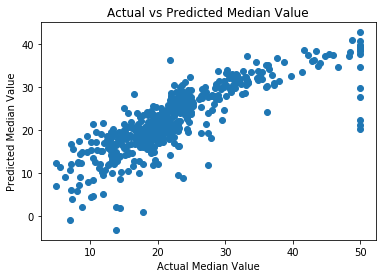

In [220]:
plt.scatter(y, y_predict)
plt.xlabel("Actual Median Value")
plt.ylabel("Predicted Median Value")
plt.title("Actual vs Predicted Median Value");

#scatterplot shows the data is fairly linear

The results are suggesting that the median value of owner-occupied homes are highly sensitive to the percentage of the neighborhood being considered "lower class" (LSTAT), the average number of rooms in a home (RM), and the ratio of students to teachers in primary and secondary schools in the neighborhood (PTRATIO). This makes sense as a neighboorhood with majority "lower class" citizens would demand lower home prices (higher LSTAT, lower MEDV). With all other factors constant, more rooms implies more sq. feet, which demands higher home prices (higher RM, higher MEDV). Finally, a higher student to teacher ratio may imply larger class sizes which is more common in public schools that private schools. Home prices in areas with more private schools can expect to be higher given the required tuition versus public schools (higher LSTAT, lower MEDV).


### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [221]:
from sklearn.model_selection import train_test_split

#creating 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [222]:
print(X.shape) #no split
print(X_train.shape) #train split 70
print(X_test.shape) #test split 30

(506, 3)
(354, 3)
(152, 3)


In [223]:
#initializing model
lreg = LinearRegression()

In [224]:
#fitting model
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [225]:
#predicting the model
y_prediction = lreg.predict(X_test)

In [226]:
y_prediction

array([26.92298627, 30.93686434, 16.47934188, 25.25409179, 18.28052198,
       22.71776451, 17.48030837, 12.67868396, 20.65299142, 19.72674849,
       19.62053908, 21.39117368, -1.63888554, 22.28305258, 19.5334365 ,
       24.73953404, 17.1762308 ,  3.83959545, 39.02235903, 17.25781087,
       25.90189855, 27.47962656, 11.74316928, 23.53277967, 17.93698432,
       13.86981688, 22.65619649, 19.32774678, 18.15760126, 18.82706414,
       19.72132643, 25.49788496, 25.14274849, 18.4146037 , 14.50579644,
       21.30312278, 32.36532273, 20.91382657, 20.20888187, 24.82872147,
       12.74319123, 28.21994868, 39.52761971, 18.8078418 , 26.03183697,
       15.77223641, 14.27426728, 26.09480414, 18.29649761, 31.22324968,
       23.74269632, 33.559009  , 16.01682884, 25.67415581, 38.30791834,
       22.41596988, 18.34605716, 30.13739458, 24.81027677, 15.41857328,
       25.51195584, 32.09021934, 30.05047579, 17.23144792, 28.34222612,
       11.86980665, 19.1480674 , 25.75429805, 29.12514764, 15.79

In [227]:
lreg.score(X_test, y_test)

0.650904156861472

In [228]:
lreg.intercept_

18.119085045192

In [229]:
lreg.coef_

array([-0.60815   ,  4.46162598, -0.86290452])

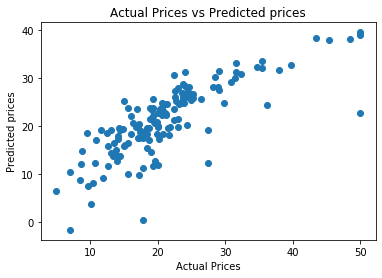

In [230]:
plt.scatter(y_test, y_prediction)
plt.xlabel("Actual Prices") #y_test
plt.ylabel("Predicted prices") #y_prediction
plt.title("Actual Prices vs Predicted prices");

In [231]:
#creating 90/10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [232]:
print(X.shape) #no split
print(X_train.shape) #train split 90%
print(X_test.shape) #test split 10%

(506, 3)
(455, 3)
(51, 3)


In [233]:
#initializing model
lreg = LinearRegression()

In [234]:
#fitting model
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [235]:
#predicting the model
y_prediction = lreg.predict(X_test)

In [236]:
y_prediction

array([26.90470678, 30.7660267 , 16.51530533, 25.07098669, 18.29290089,
       22.68058962, 17.58657909, 12.7931355 , 20.57778765, 19.72107836,
       19.79373792, 21.59263218, -1.20941549, 22.25386938, 19.46440788,
       24.63109392, 17.2413894 ,  4.13700811, 38.94795853, 17.28879782,
       25.7608893 , 27.3855957 , 11.83932351, 23.35872197, 17.92128342,
       13.91001672, 22.56618159, 19.36392946, 18.2344704 , 18.81954374,
       19.82658369, 25.32911631, 25.0661075 , 18.29586961, 14.6030308 ,
       21.50067326, 32.1918924 , 20.78123   , 20.23208251, 24.68405588,
       12.8818999 , 28.09814292, 39.43818015, 18.79375013, 25.96356247,
       15.78834438, 14.28518637, 25.93162072, 18.29073499, 31.1706618 ,
       23.8671549 ])

In [237]:
lreg.score(X_test, y_test)

0.7452159446021683

In [238]:
lreg.intercept_

18.623000080028657

In [239]:
lreg.coef_

array([-0.5880611 ,  4.44973679, -0.90070676])

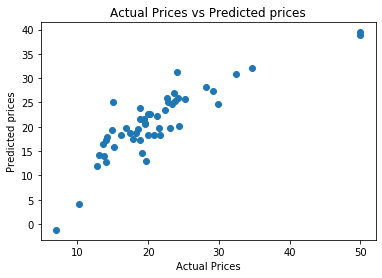

In [240]:
plt.scatter(y_test, y_prediction)
plt.xlabel("Actual Prices") #y_test
plt.ylabel("Predicted prices") #y_prediction
plt.title("Actual Prices vs Predicted prices");

Looking at the validation scores, 90/10 split (.75) performed better than the 70/30 split (.65). This could be due to having more data to train on, therefore resulting in a better performing linear model. However, given the 90/10 has less testing dating, I would expect greater variance/less accuracy in the results.

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [241]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [242]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1221.
Date:                Thu, 12 Mar 2020   Prob (F-statistic):                   1.38e-321
Time:                        18:03:13   Log-Likelihood:                         -1567.5
No. Observations:                 506   AIC:                                      3151.
Df Residuals:                     498   BIC:                                      3185.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9729      0.224     22.195      0.000       4.533       5.413
LSTAT         -0.5606      0.048    -11.795      0.000      -0.654      -0.467
RAD            0.2128      0.070      3.050      0.002       0.076       0.350
TAX           -0.0174      0.004     -4.272      0.000      -0.025      -0.009
NOX            4.3448      3.384      1.284      0.200      -2.304      10.994
INDUS          0.0924      0.067      1.383      0.167      -0.039       0.224
CRIM          -0.0891      0.037     -2.423      0.016      -0.161      -0.017
ZN             0.0288      0.013      2.220      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.139   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.155
Skew:                           1.666   Prob(JB):                    1.99e-181
Kurtosis:                       8.326   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [243]:
# Check out variable relations
import seaborn as sns

In [244]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

You can read more about it here: https://patsy.readthedocs.io/en/latest/

In [ ]:
import patsy

# Use the patsy library to run a regression model on the housing dataset
